In [1]:
import scanpy as sc
from PIL import Image
import json
import anndata as ad
import os
import pandas as pd
Image.MAX_IMAGE_PIXELS=None
sc.set_figure_params(dpi=200)

In [ ]:
thor_dir = "/Users/pengzhizhang/HF_Lai_normalize/Heart_II"
ad_s1_path = os.path.join(thor_dir, "fineST_s1", "s1_thor_adata_20.h5ad")
ad_thor_s1 = sc.read_h5ad(ad_s1_path)

ad_s2_path = os.path.join(thor_dir, "fineST_s2", "s2_thor_adata_20.h5ad")
ad_thor_s2 = sc.read_h5ad(ad_s2_path)

ads = {'s1': ad_thor_s1, 's2': ad_thor_s2}

### S1

In [5]:
adata_filter_unselected = ad_thor_s1[ad_thor_s1.obs["ROI"]!="Unselected"].copy()

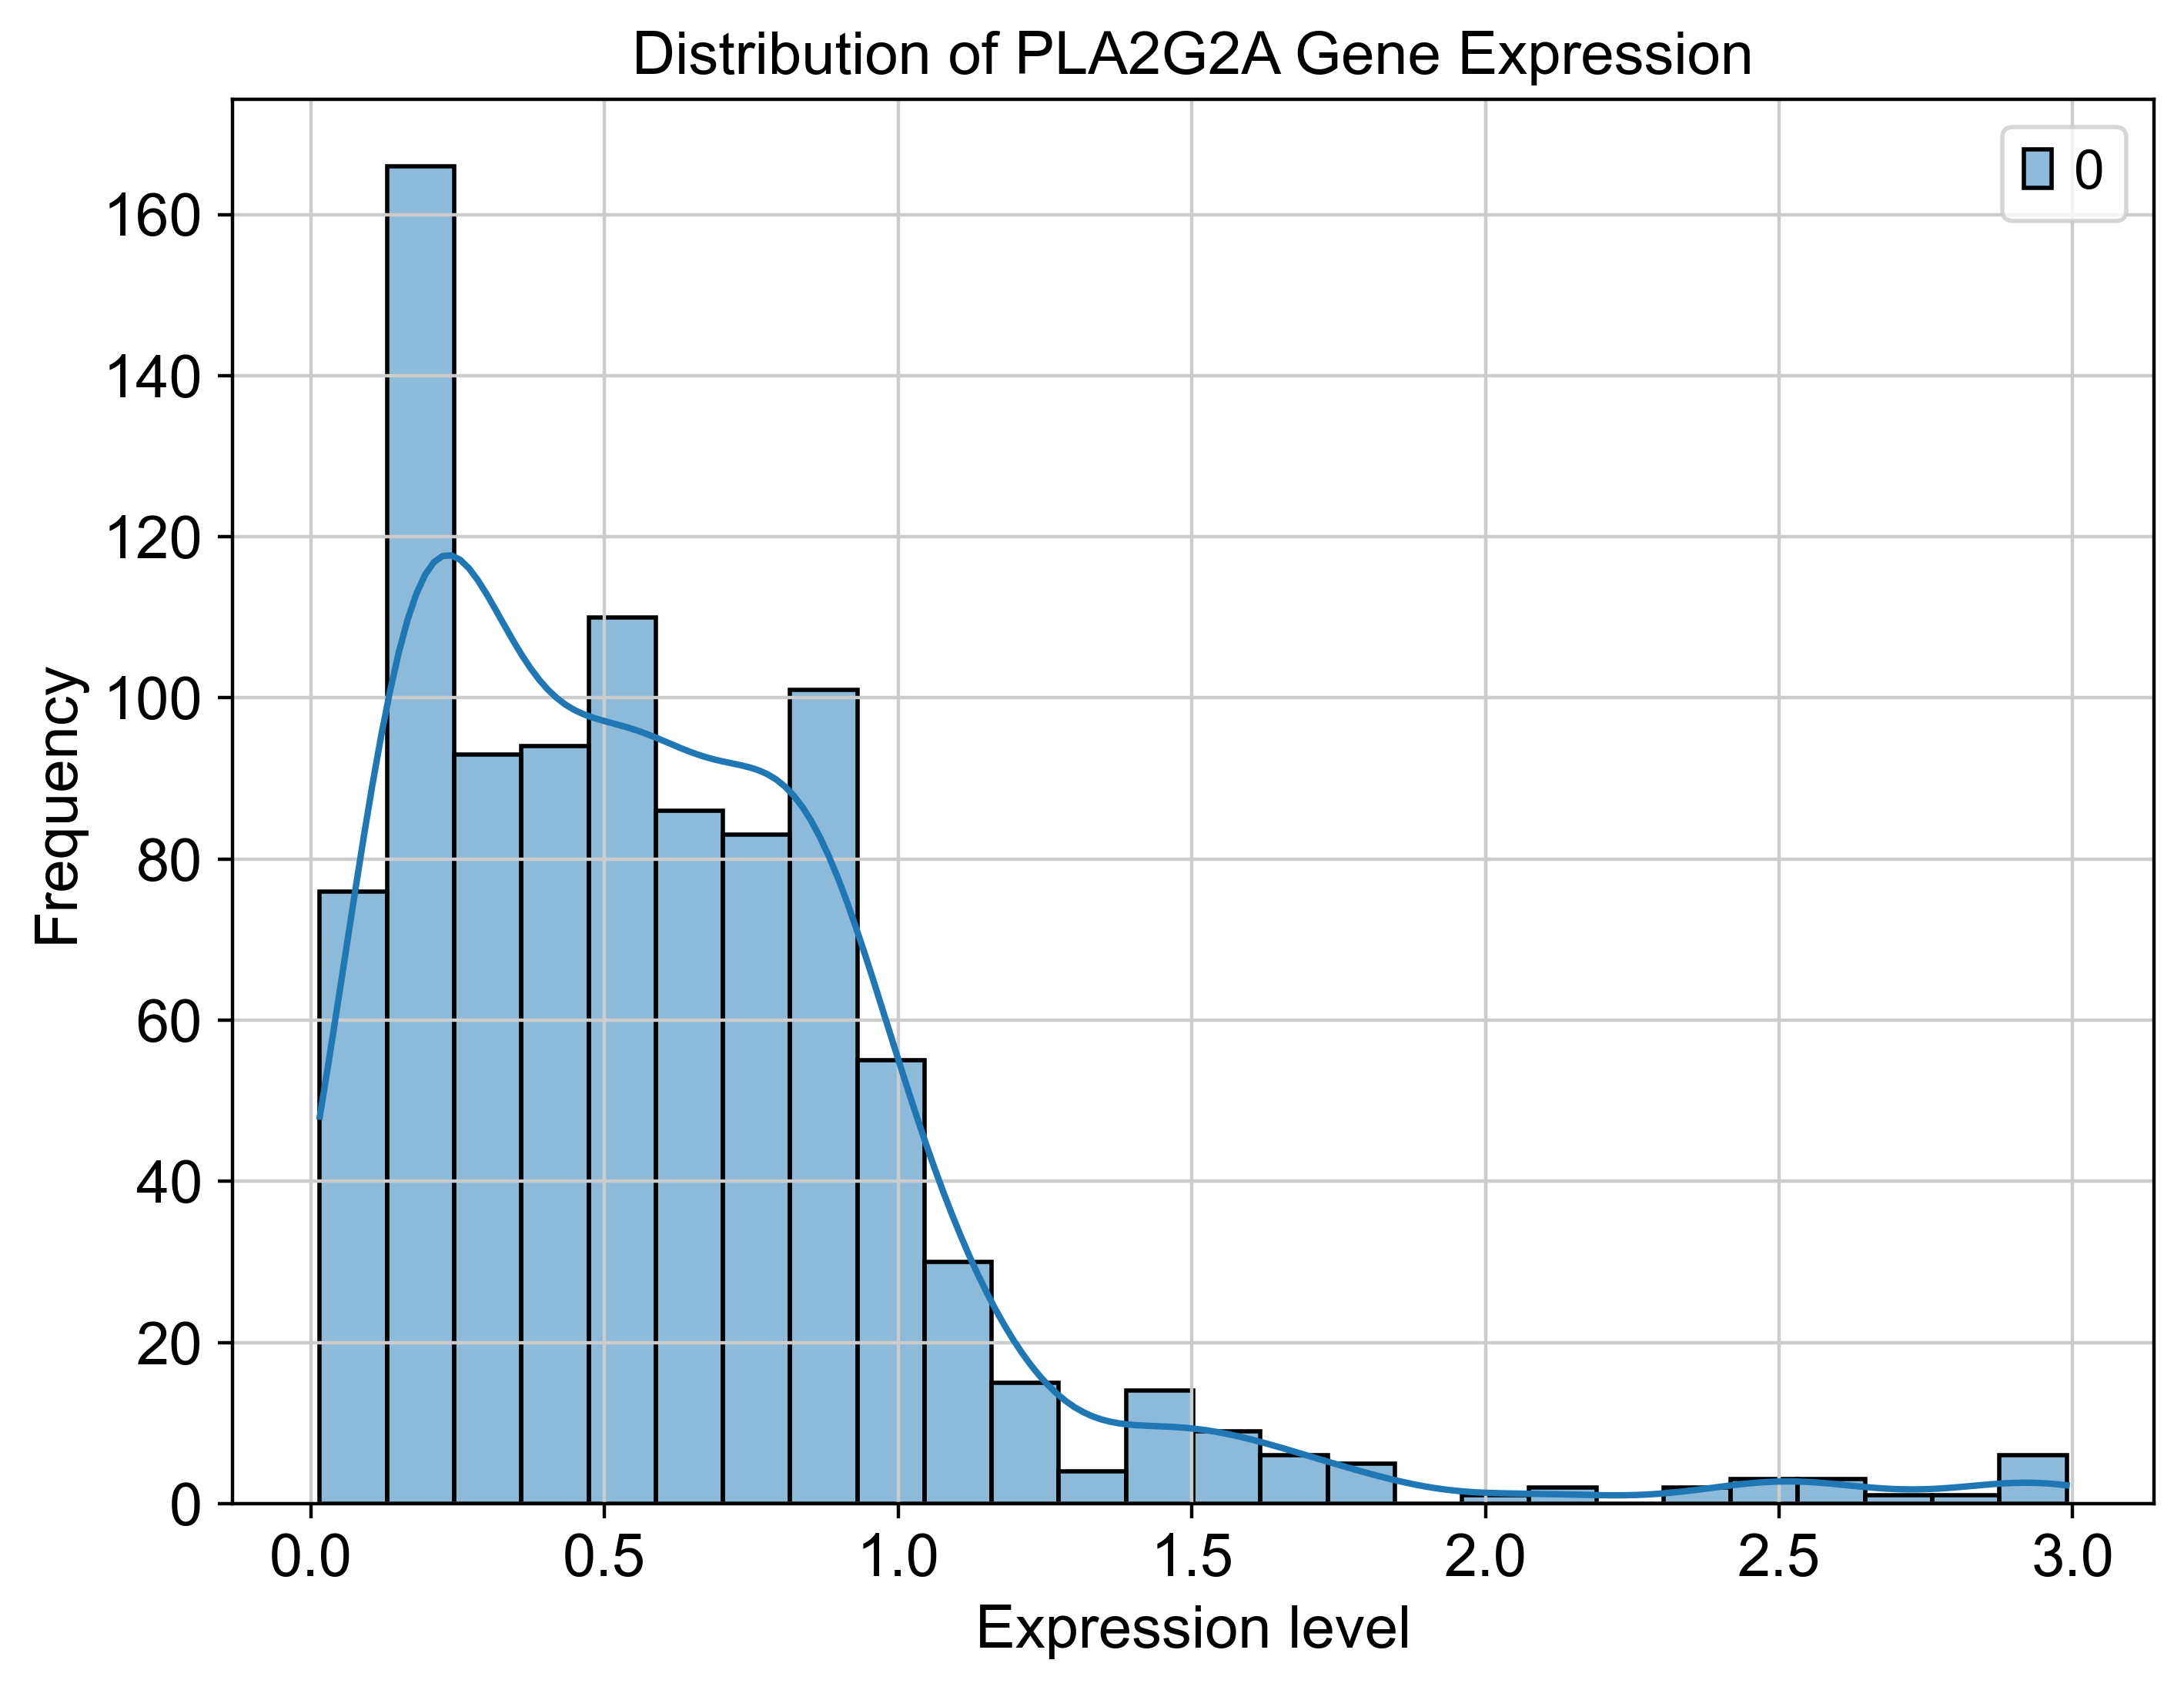

In [6]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

# Load your AnnData object
# Assuming your AnnData object is loaded into a variable named `adata`

# Check if "PLA2G2A" gene is present in the AnnData object
if "PLA2G2A" in adata_filter_unselected.var_names:
    # Extract the expression values for "PLA2G2A" gene
    gene_expression = adata_filter_unselected[:, adata_filter_unselected.var_names == "PLA2G2A"].X.toarray()
    
    
    # Plot the distribution using seaborn's histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(gene_expression, kde=True)
    plt.title("Distribution of PLA2G2A Gene Expression")
    plt.xlabel("Expression level")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The gene PLA2G2A is not present in the AnnData object.")


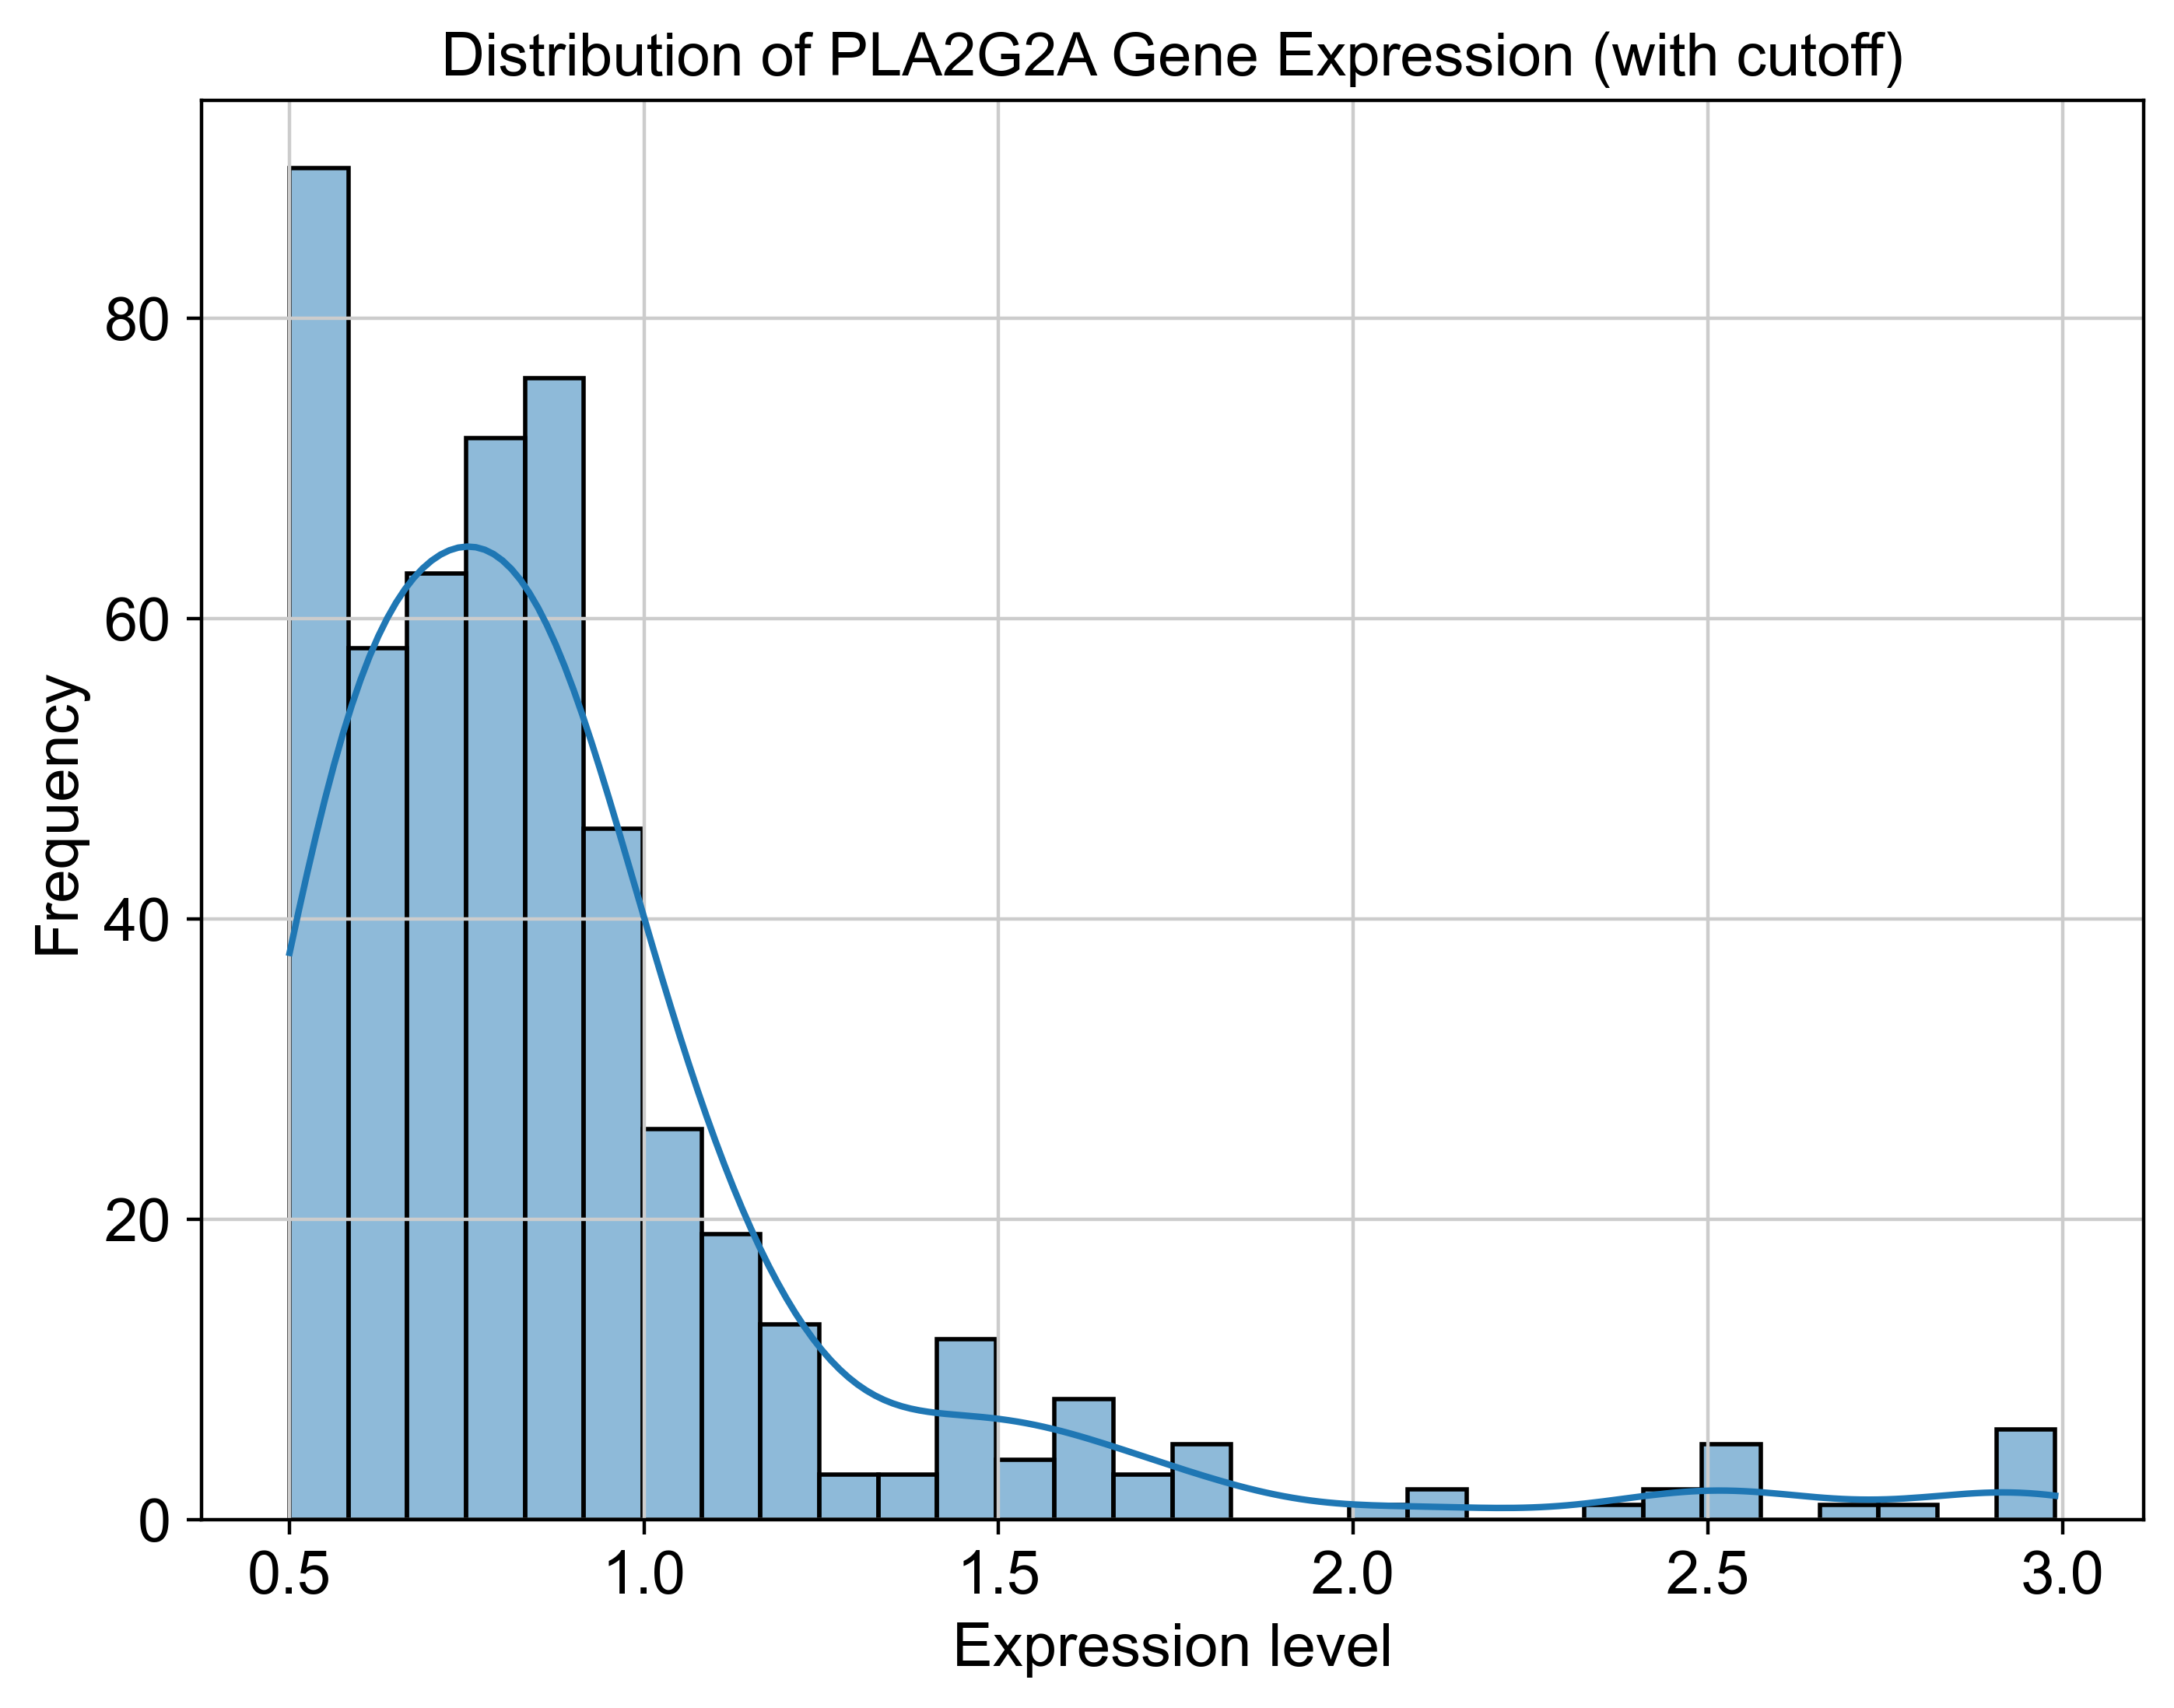

In [8]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your AnnData object
# Assuming your AnnData object is loaded into a variable named `adata`

# Set a threshold expression level
threshold = 0.5  # Adjust this threshold as needed

# Check if "PLA2G2A" gene is present in the AnnData object
if "PLA2G2A" in adata_filter_unselected.var_names:
    # Extract the expression values for "PLA2G2A" gene
    gene_expression = adata_filter_unselected[:, adata_filter_unselected.var_names == "PLA2G2A"].X.toarray()
    
    # Filter out low-expression cells based on the threshold
    high_expression_cells = gene_expression >= threshold
    
    # Plot the distribution using seaborn's histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(gene_expression[high_expression_cells], kde=True)
    plt.title("Distribution of PLA2G2A Gene Expression (with cutoff)")
    plt.xlabel("Expression level")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The gene PLA2G2A is not present in the AnnData object.")


In [10]:
adata_filter_unselected.obs["PLA2G2A_high_express"] = high_expression_cells
adata_filter_unselected.obs["PLA2G2A_high_express"] = adata_filter_unselected.obs["PLA2G2A_high_express"].astype("category")

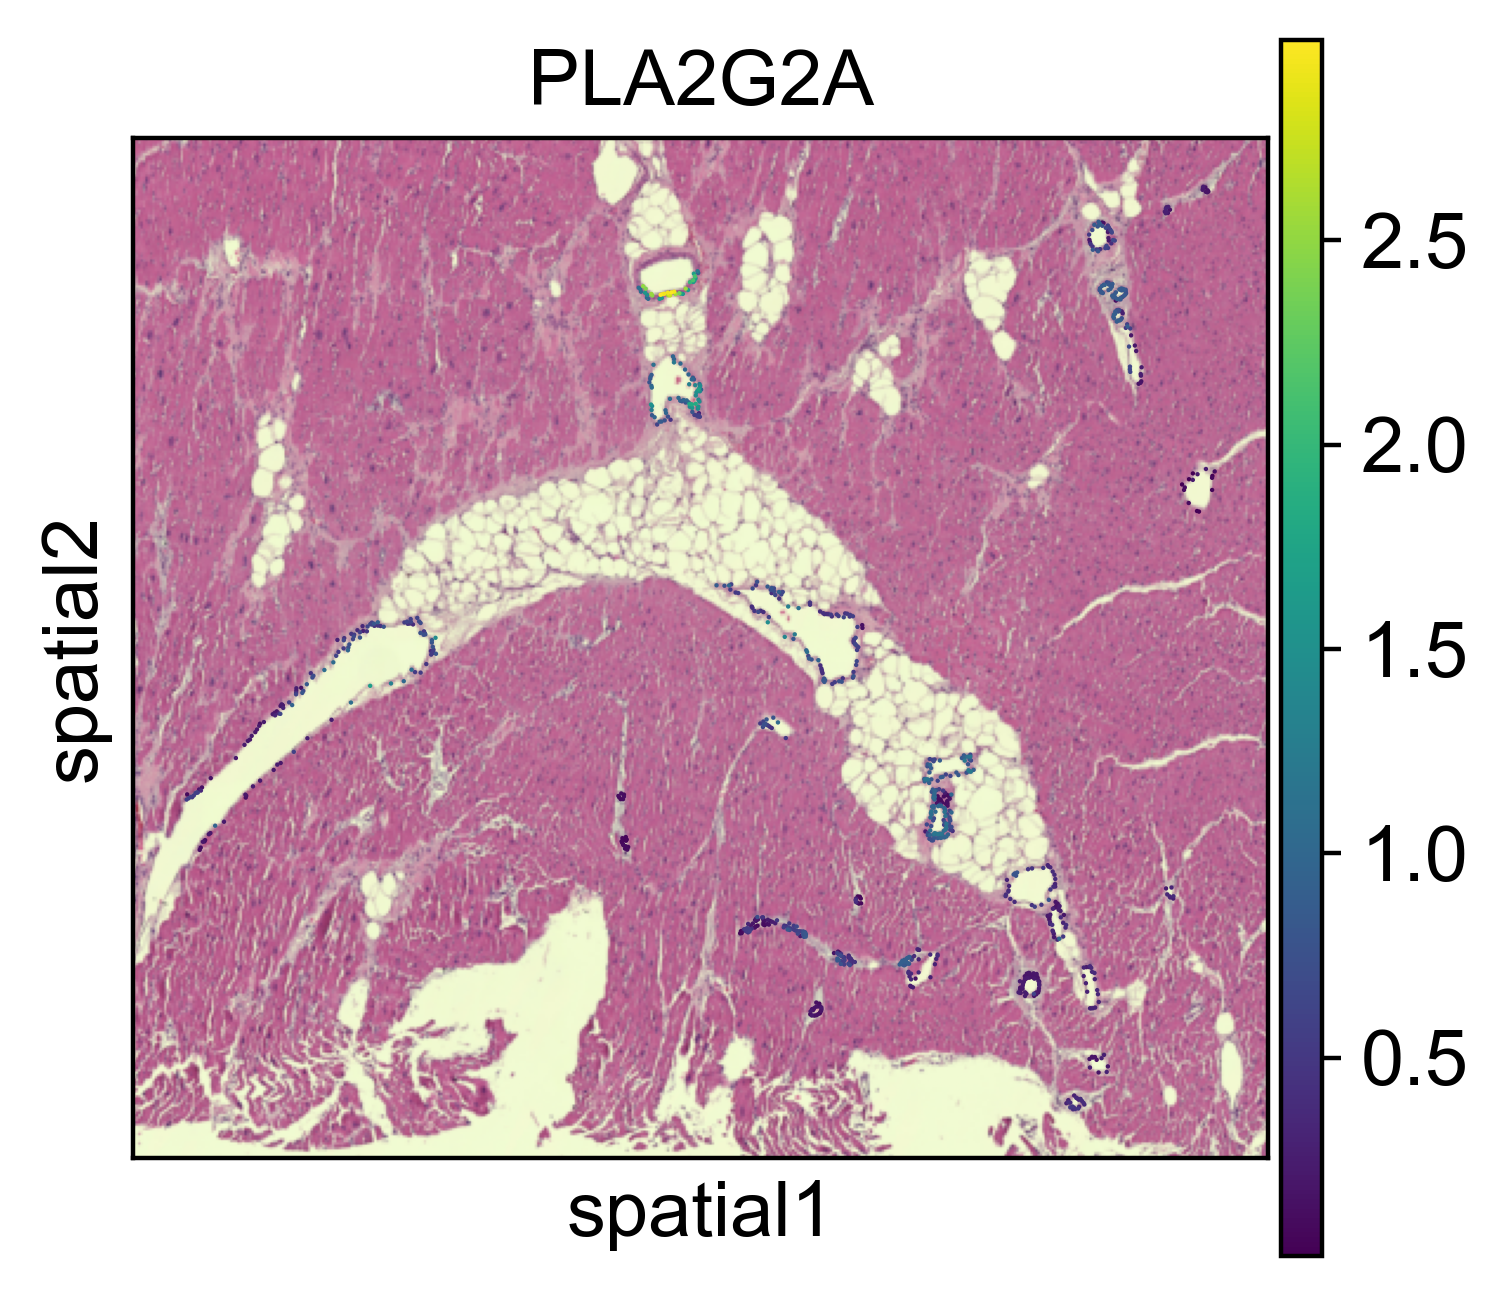

In [324]:
sc.pl.spatial(adata_filter_unselected,color="PLA2G2A",spot_size=30)

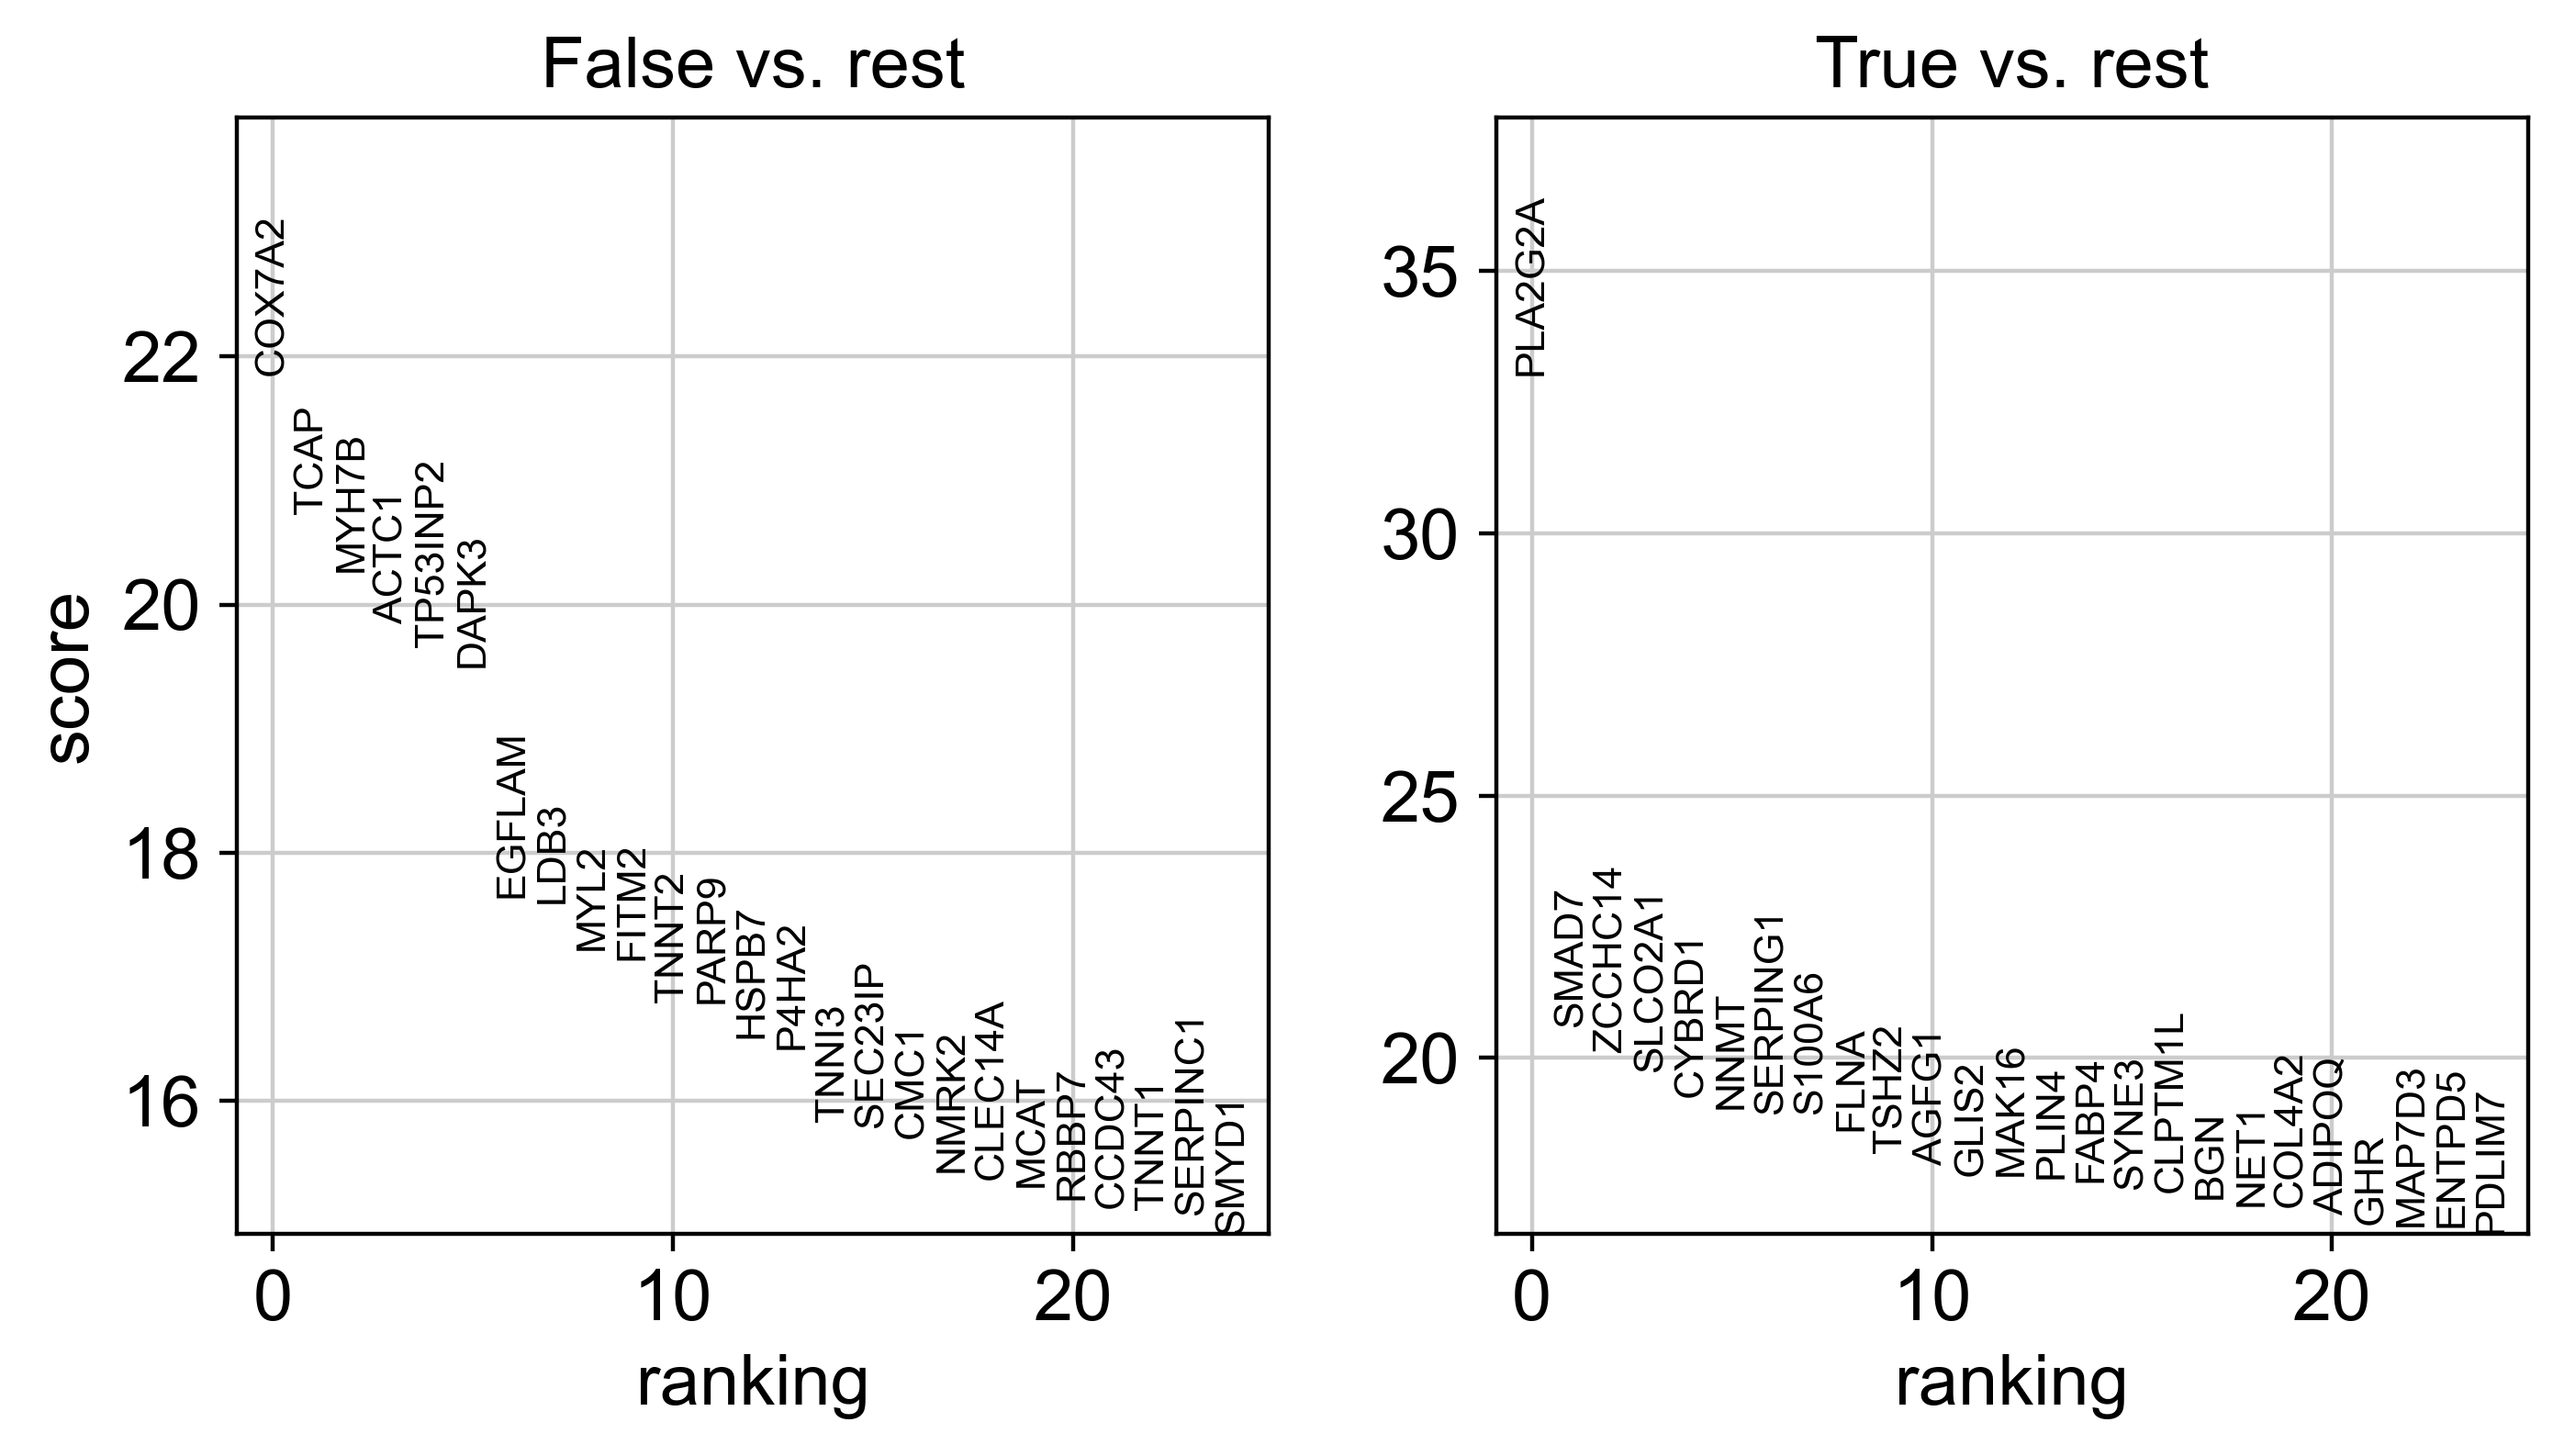

In [325]:
sc.tl.rank_genes_groups(adata_filter_unselected, 'PLA2G2A_high_express', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_filter_unselected, n_genes=25, sharey=False, key = "t-test")

In [5]:
adata_filter_unselected[adata_filter_unselected.obs["PLA2G2A_high_express"] == True]

View of AnnData object with n_obs × n_vars = 520 × 6998
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'seg_label', 'spot_heterogeneity', 'node_weights', 'ROI', 'PLA2G2A_high_express'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'used_for_prediction', 'used_for_reduced', 'used_for_vae'
    uns: 'PLA2G2A_high_express_colors', 'ROI_colors', 'cell_image_props', 'log1p', 'sample_colors', 'snn', 'spatial', 't-test', 't-test_ov', 'wilcoxon'
    obsm: 'spatial'
    obsp: 'snn_connectivities', 'snn_knn_connectivities', 'snn_transition_matrix'

In [258]:
df = pd.DataFrame()

In [259]:
df["gene_name"] = adata_filter_unselected.uns['t-test']["names"]["True"]
df["logfoldchanges"] = adata_filter_unselected.uns['t-test']["logfoldchanges"]["True"]
df["pvals_adj"] = adata_filter_unselected.uns['t-test']["pvals_adj"]["True"]


In [265]:
df_s1=df[:500].copy()

### s2

In [ ]:
adata_filter_unselected = ad_thor_s2[ad_thor_s2.obs["ROI"]!="Unselected"].copy()

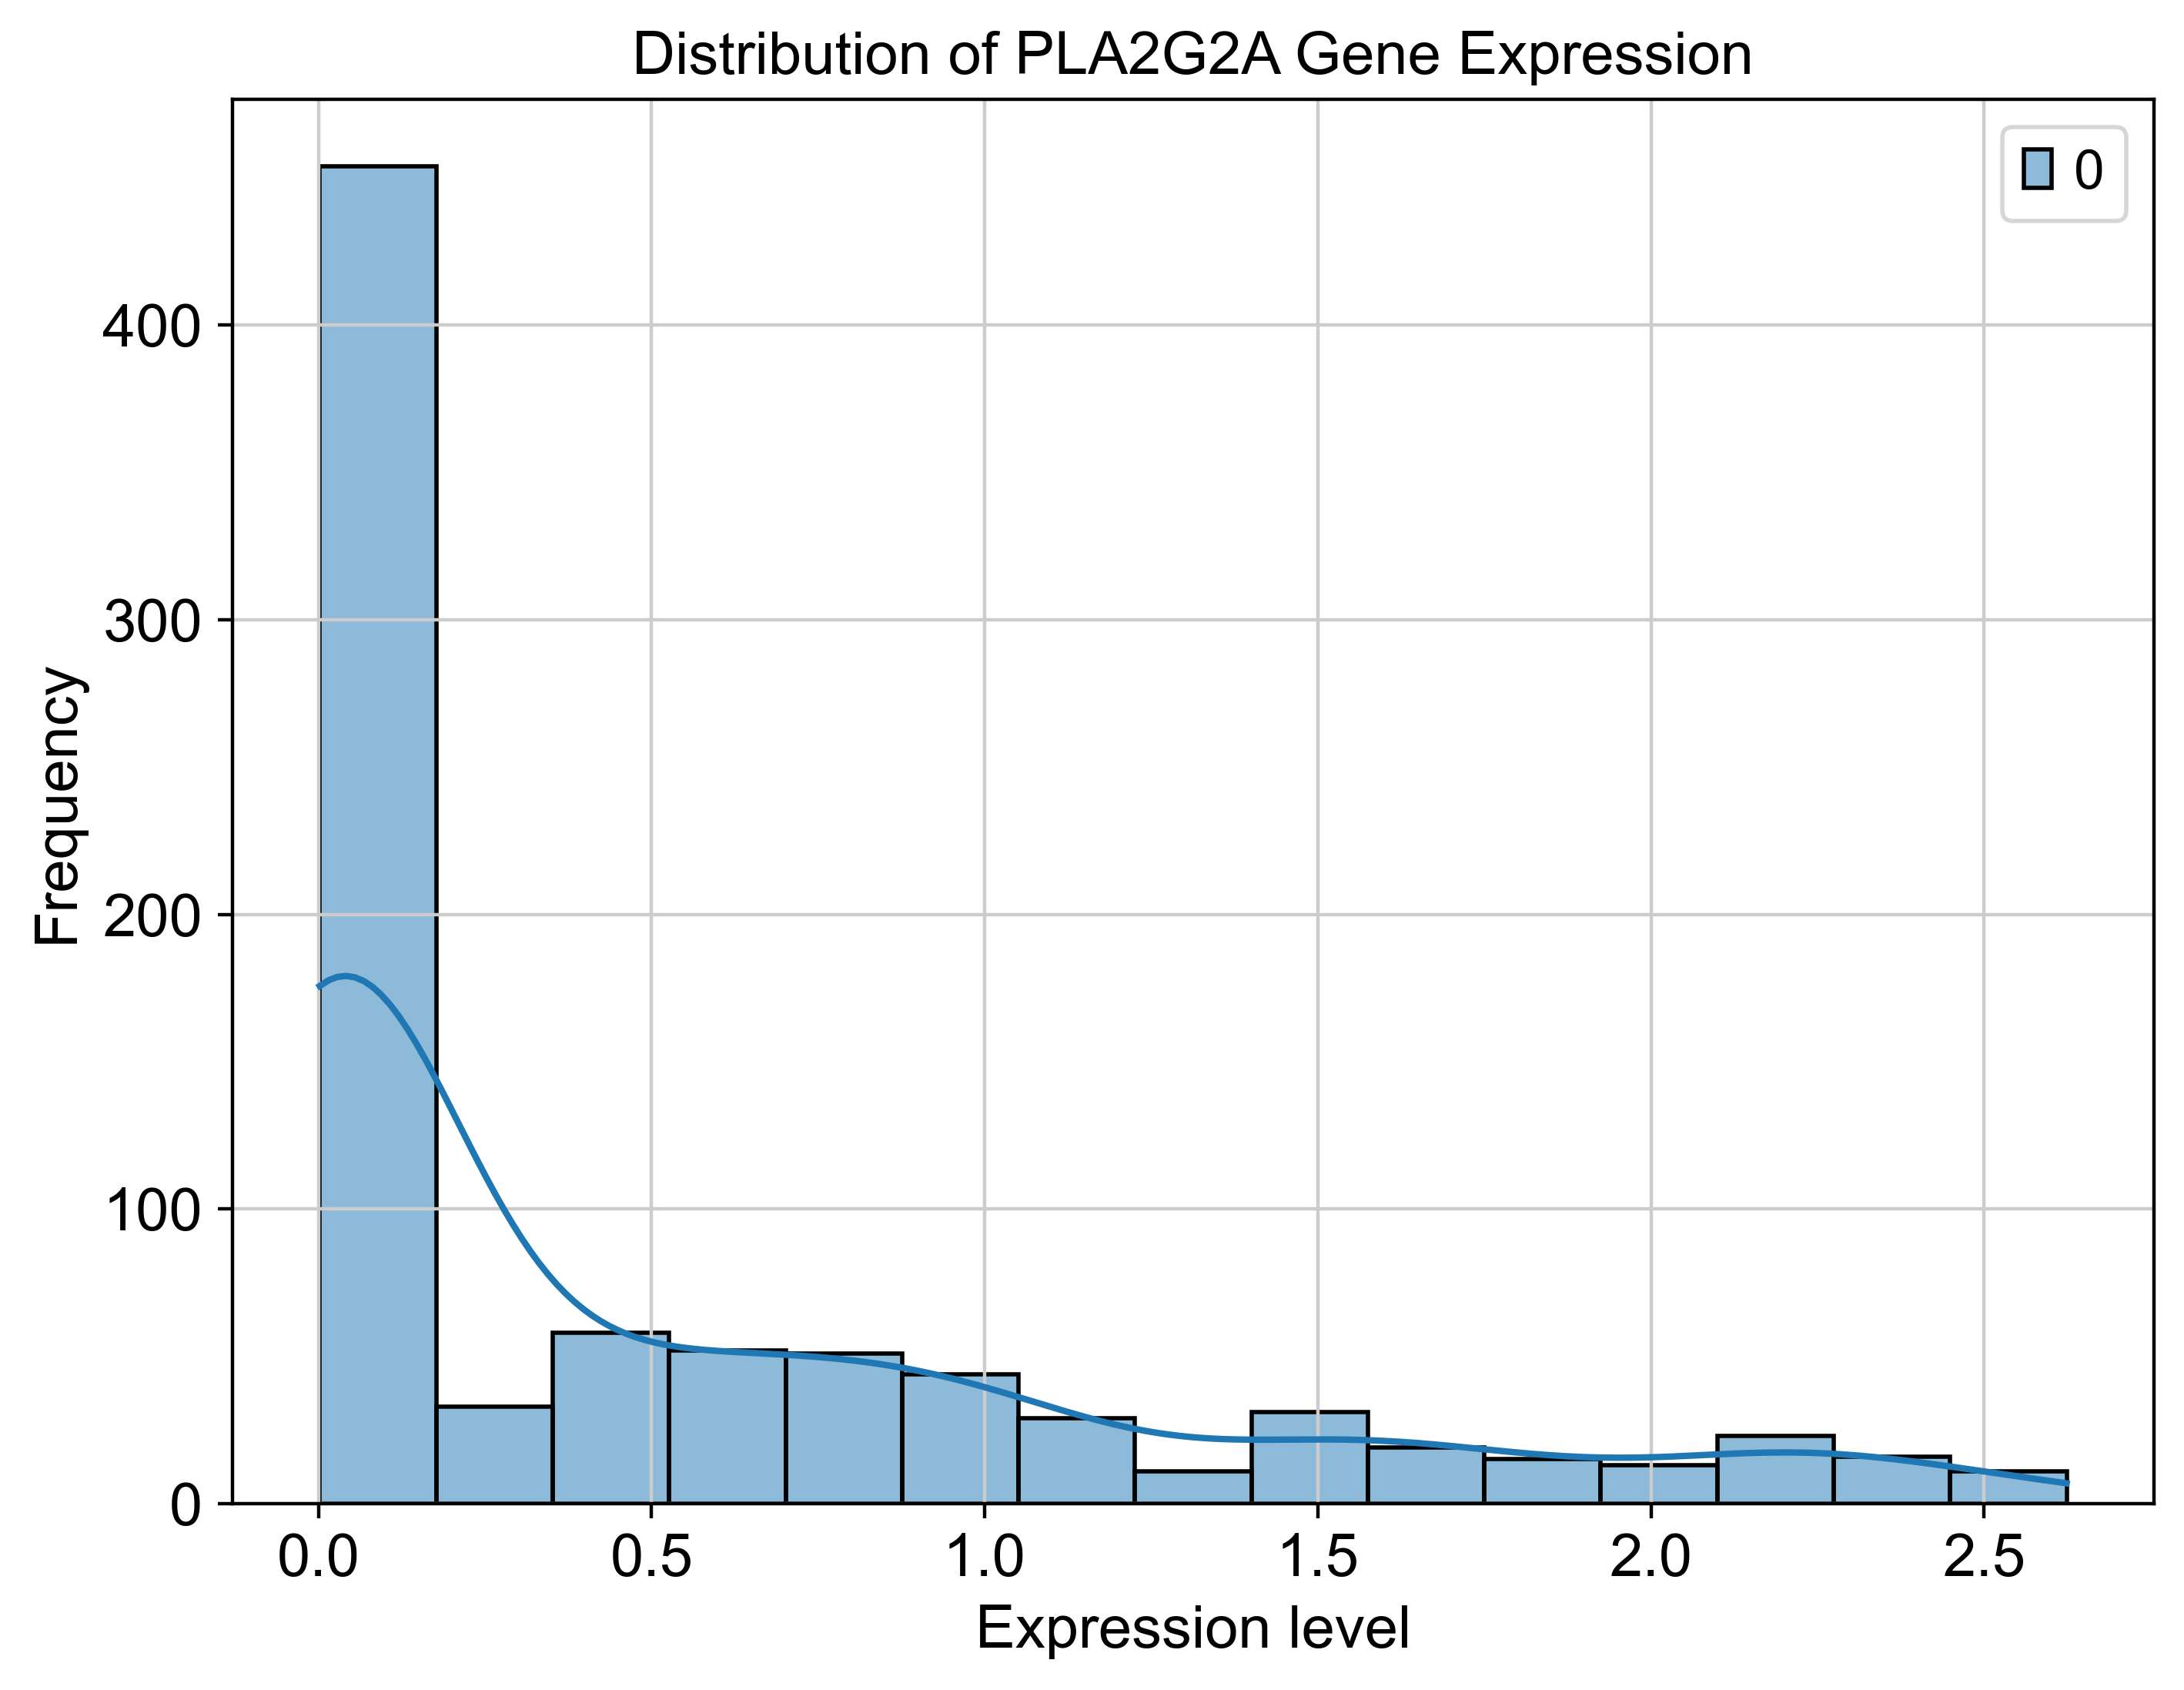

In [336]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

# Load your AnnData object
# Assuming your AnnData object is loaded into a variable named `adata`

# Check if "PLA2G2A" gene is present in the AnnData object
if "PLA2G2A" in adata_filter_unselected.var_names:
    # Extract the expression values for "PLA2G2A" gene
    gene_expression = adata_filter_unselected[:, adata_filter_unselected.var_names == "PLA2G2A"].X.toarray()
    
    
    # Plot the distribution using seaborn's histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(gene_expression, kde=True)
    plt.title("Distribution of PLA2G2A Gene Expression")
    plt.xlabel("Expression level")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The gene PLA2G2A is not present in the AnnData object.")


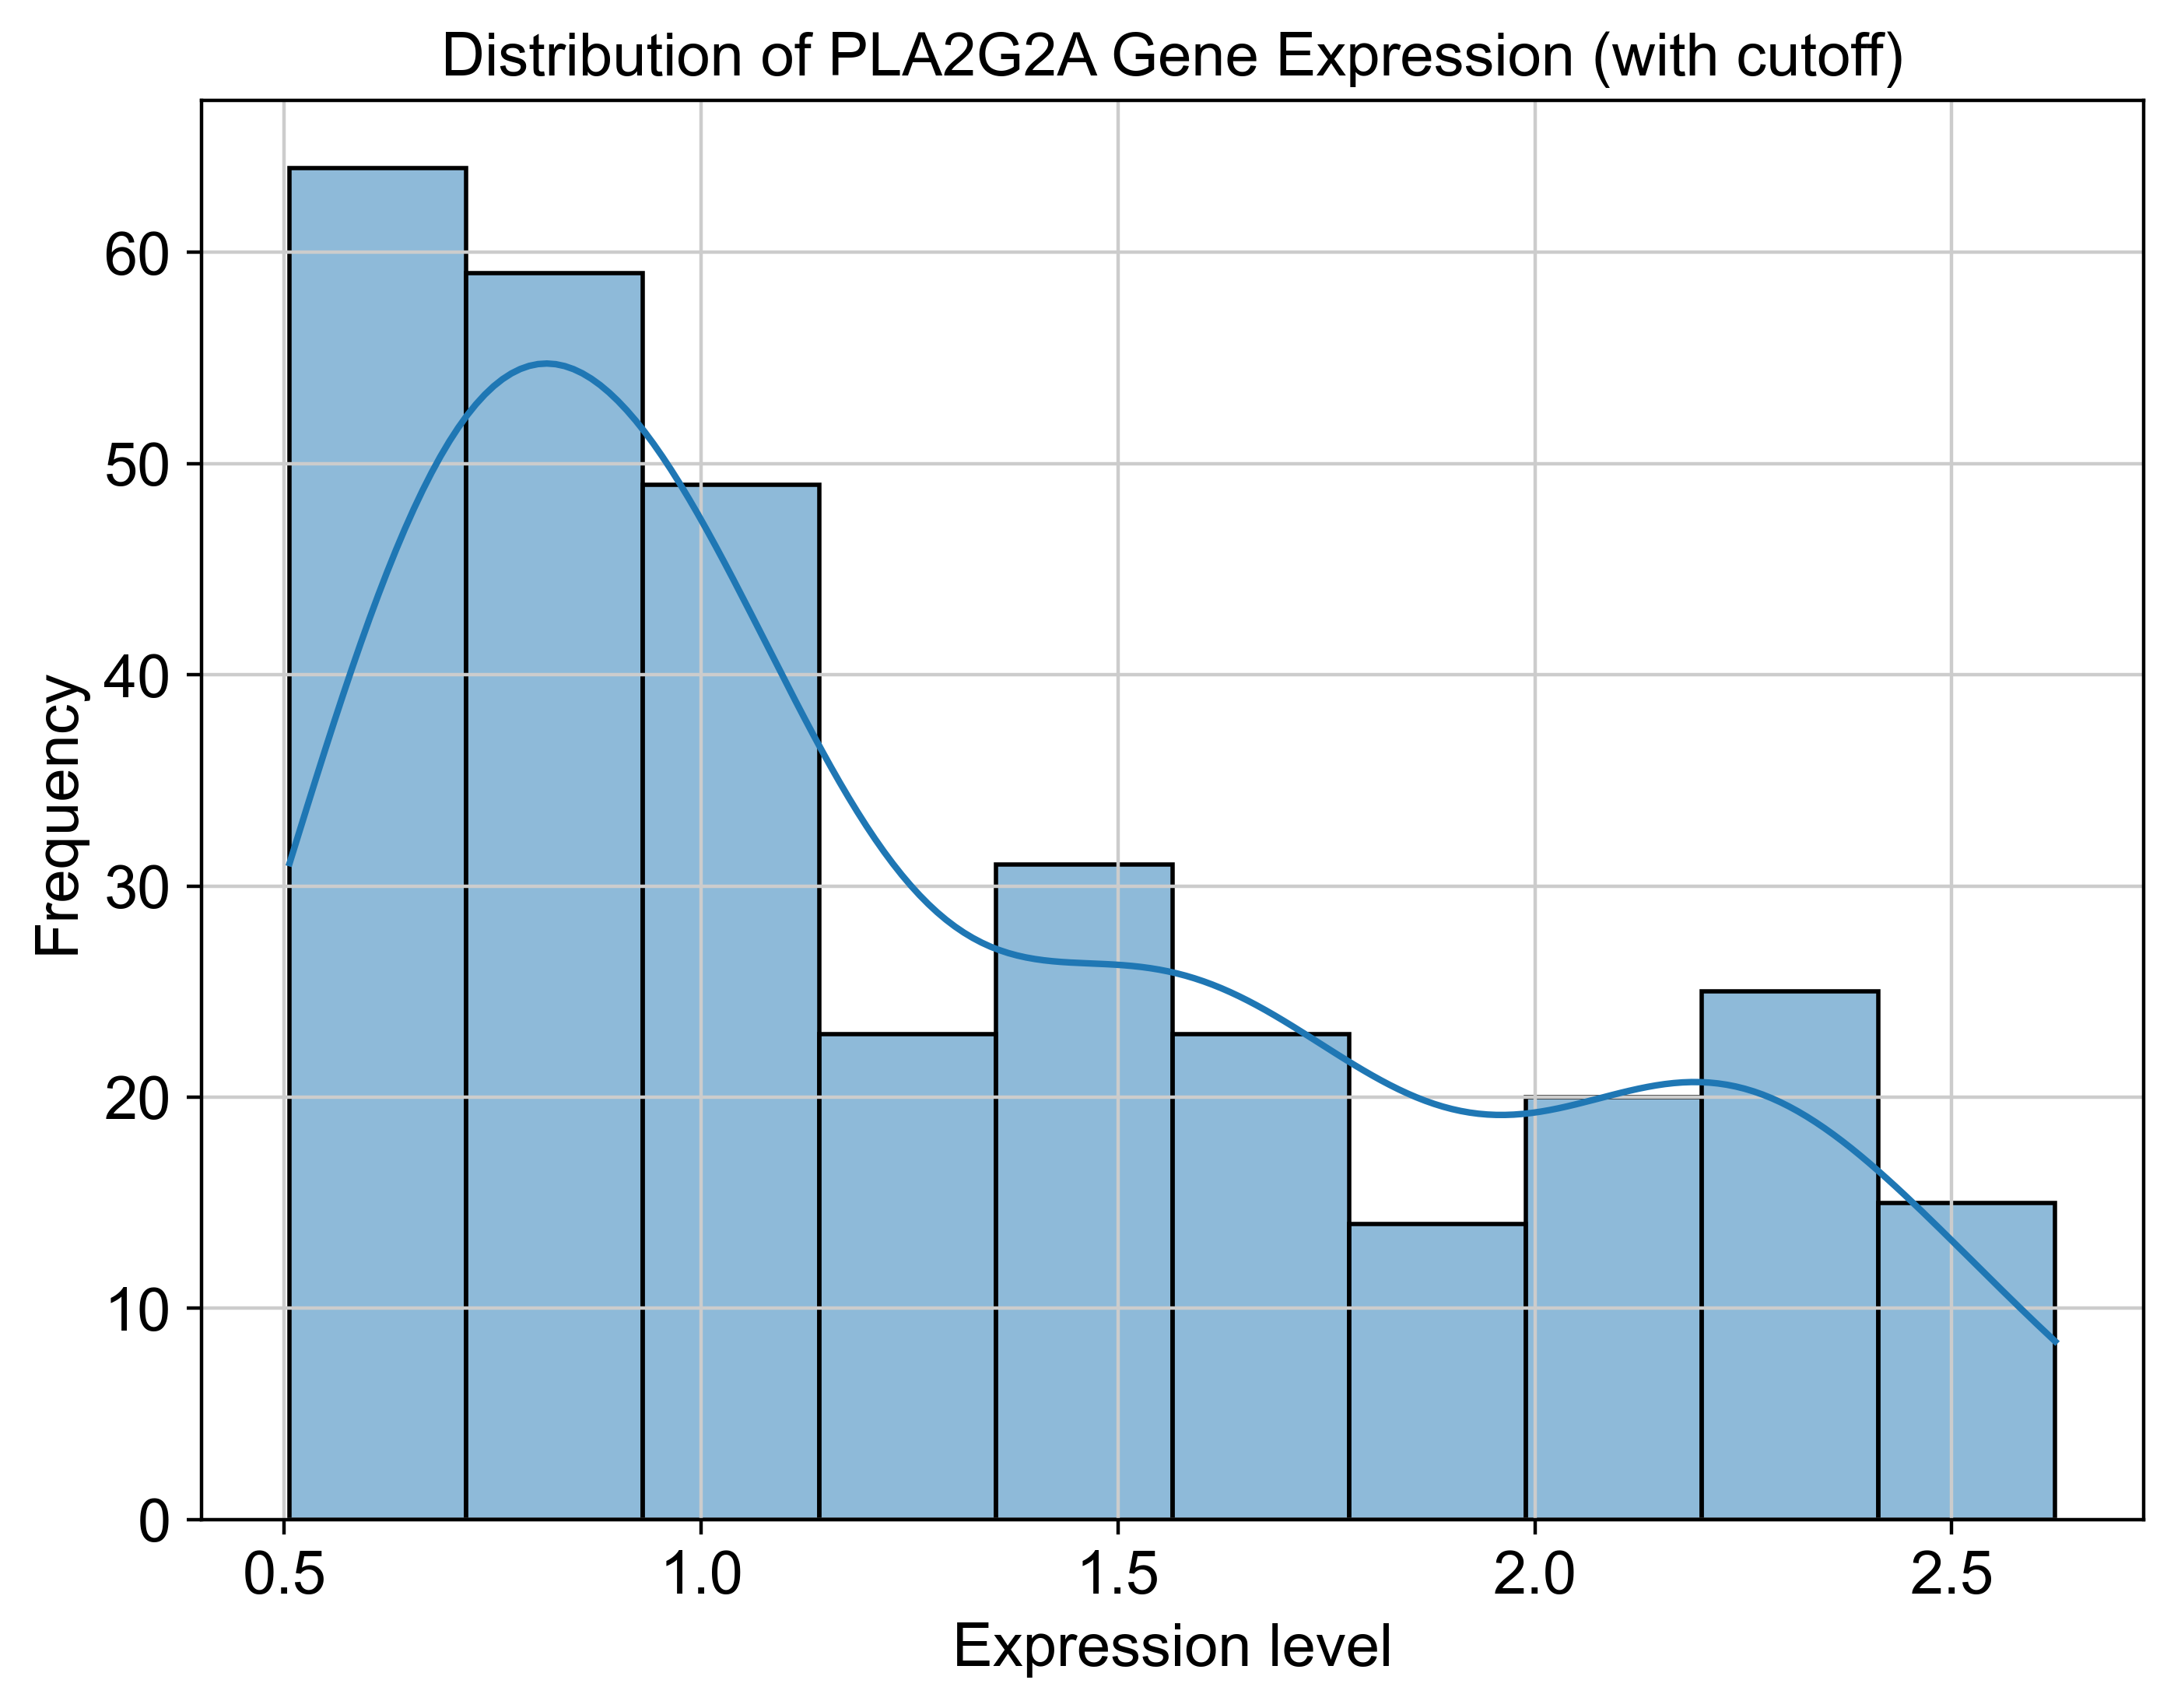

In [337]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your AnnData object
# Assuming your AnnData object is loaded into a variable named `adata`

# Set a threshold expression level
threshold = 0.5  # Adjust this threshold as needed

# Check if "PLA2G2A" gene is present in the AnnData object
if "PLA2G2A" in adata_filter_unselected.var_names:
    # Extract the expression values for "PLA2G2A" gene
    gene_expression = adata_filter_unselected[:, adata_filter_unselected.var_names == "PLA2G2A"].X.toarray()
    
    # Filter out low-expression cells based on the threshold
    high_expression_cells = gene_expression >= threshold
    
    # Plot the distribution using seaborn's histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(gene_expression[high_expression_cells], kde=True)
    plt.title("Distribution of PLA2G2A Gene Expression (with cutoff)")
    plt.xlabel("Expression level")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The gene PLA2G2A is not present in the AnnData object.")


In [338]:
adata_filter_unselected.obs["PLA2G2A_high_express"] = high_expression_cells
adata_filter_unselected.obs["PLA2G2A_high_express"] = adata_filter_unselected.obs["PLA2G2A_high_express"].astype("category")

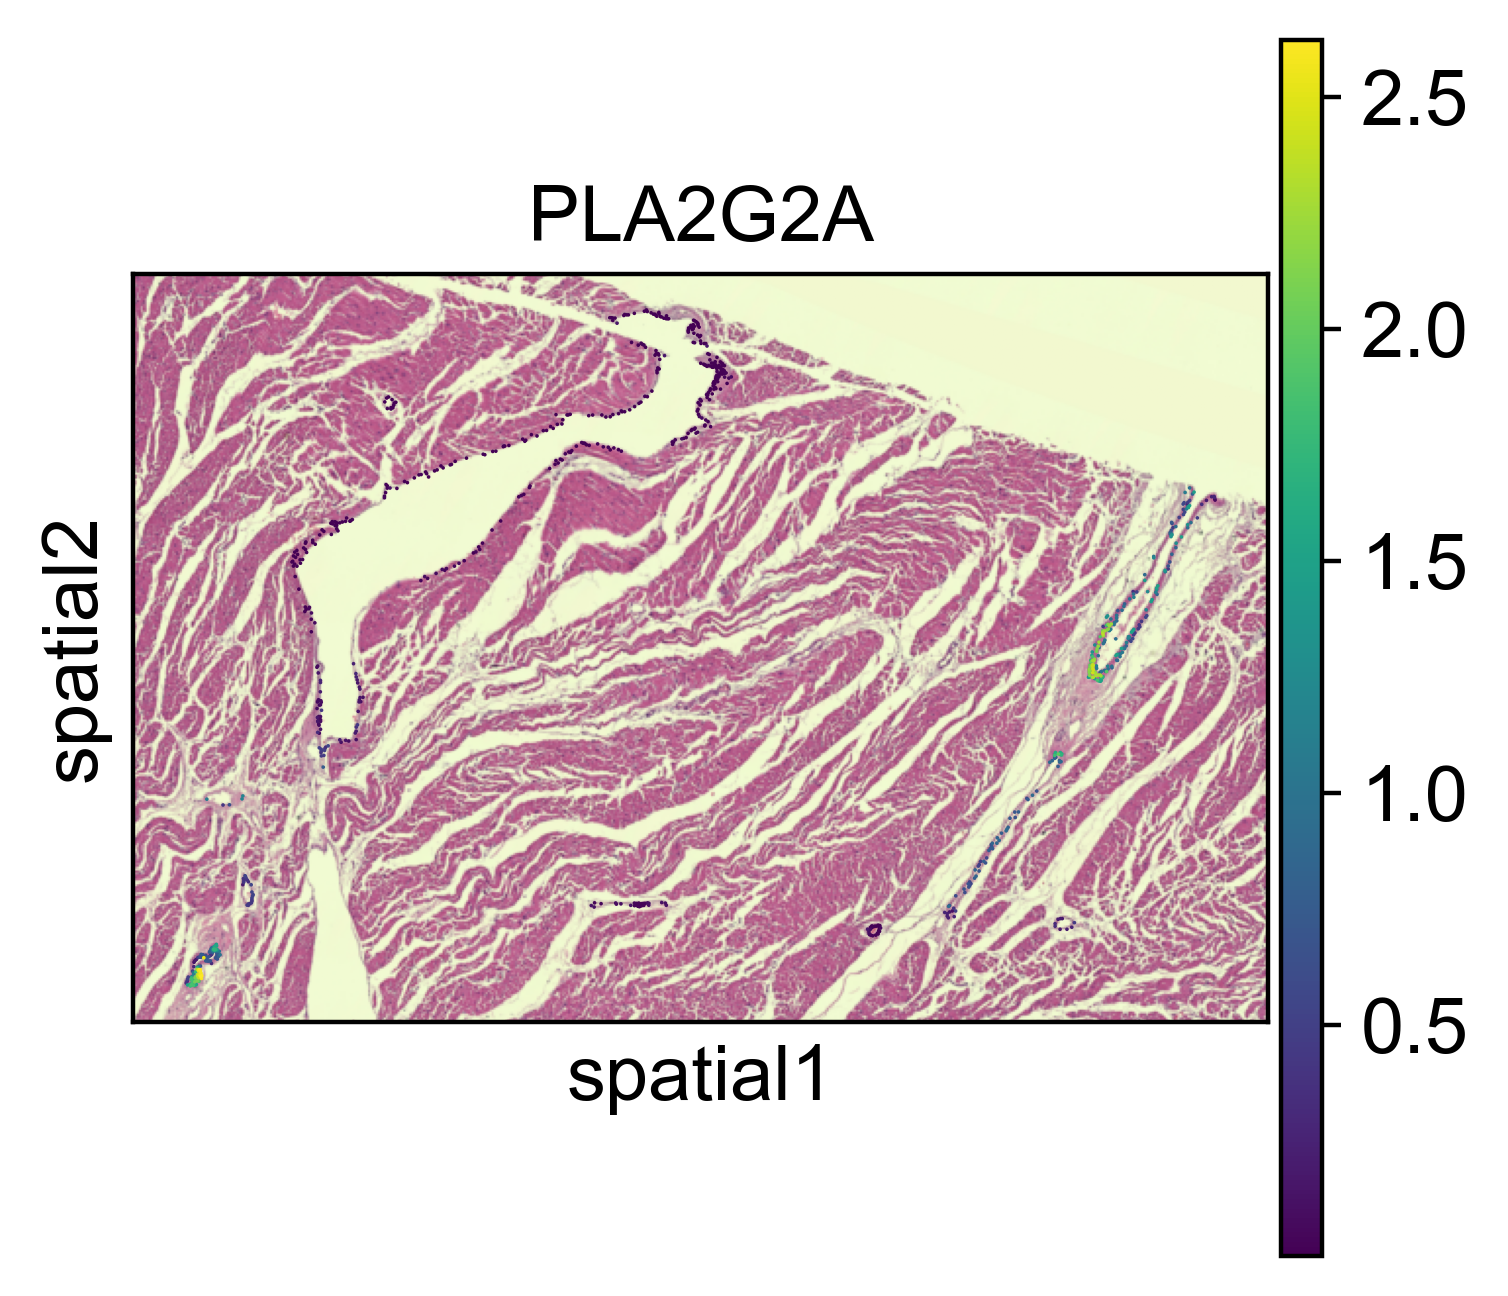

In [340]:
sc.pl.spatial(adata_filter_unselected,color="PLA2G2A",spot_size=30)

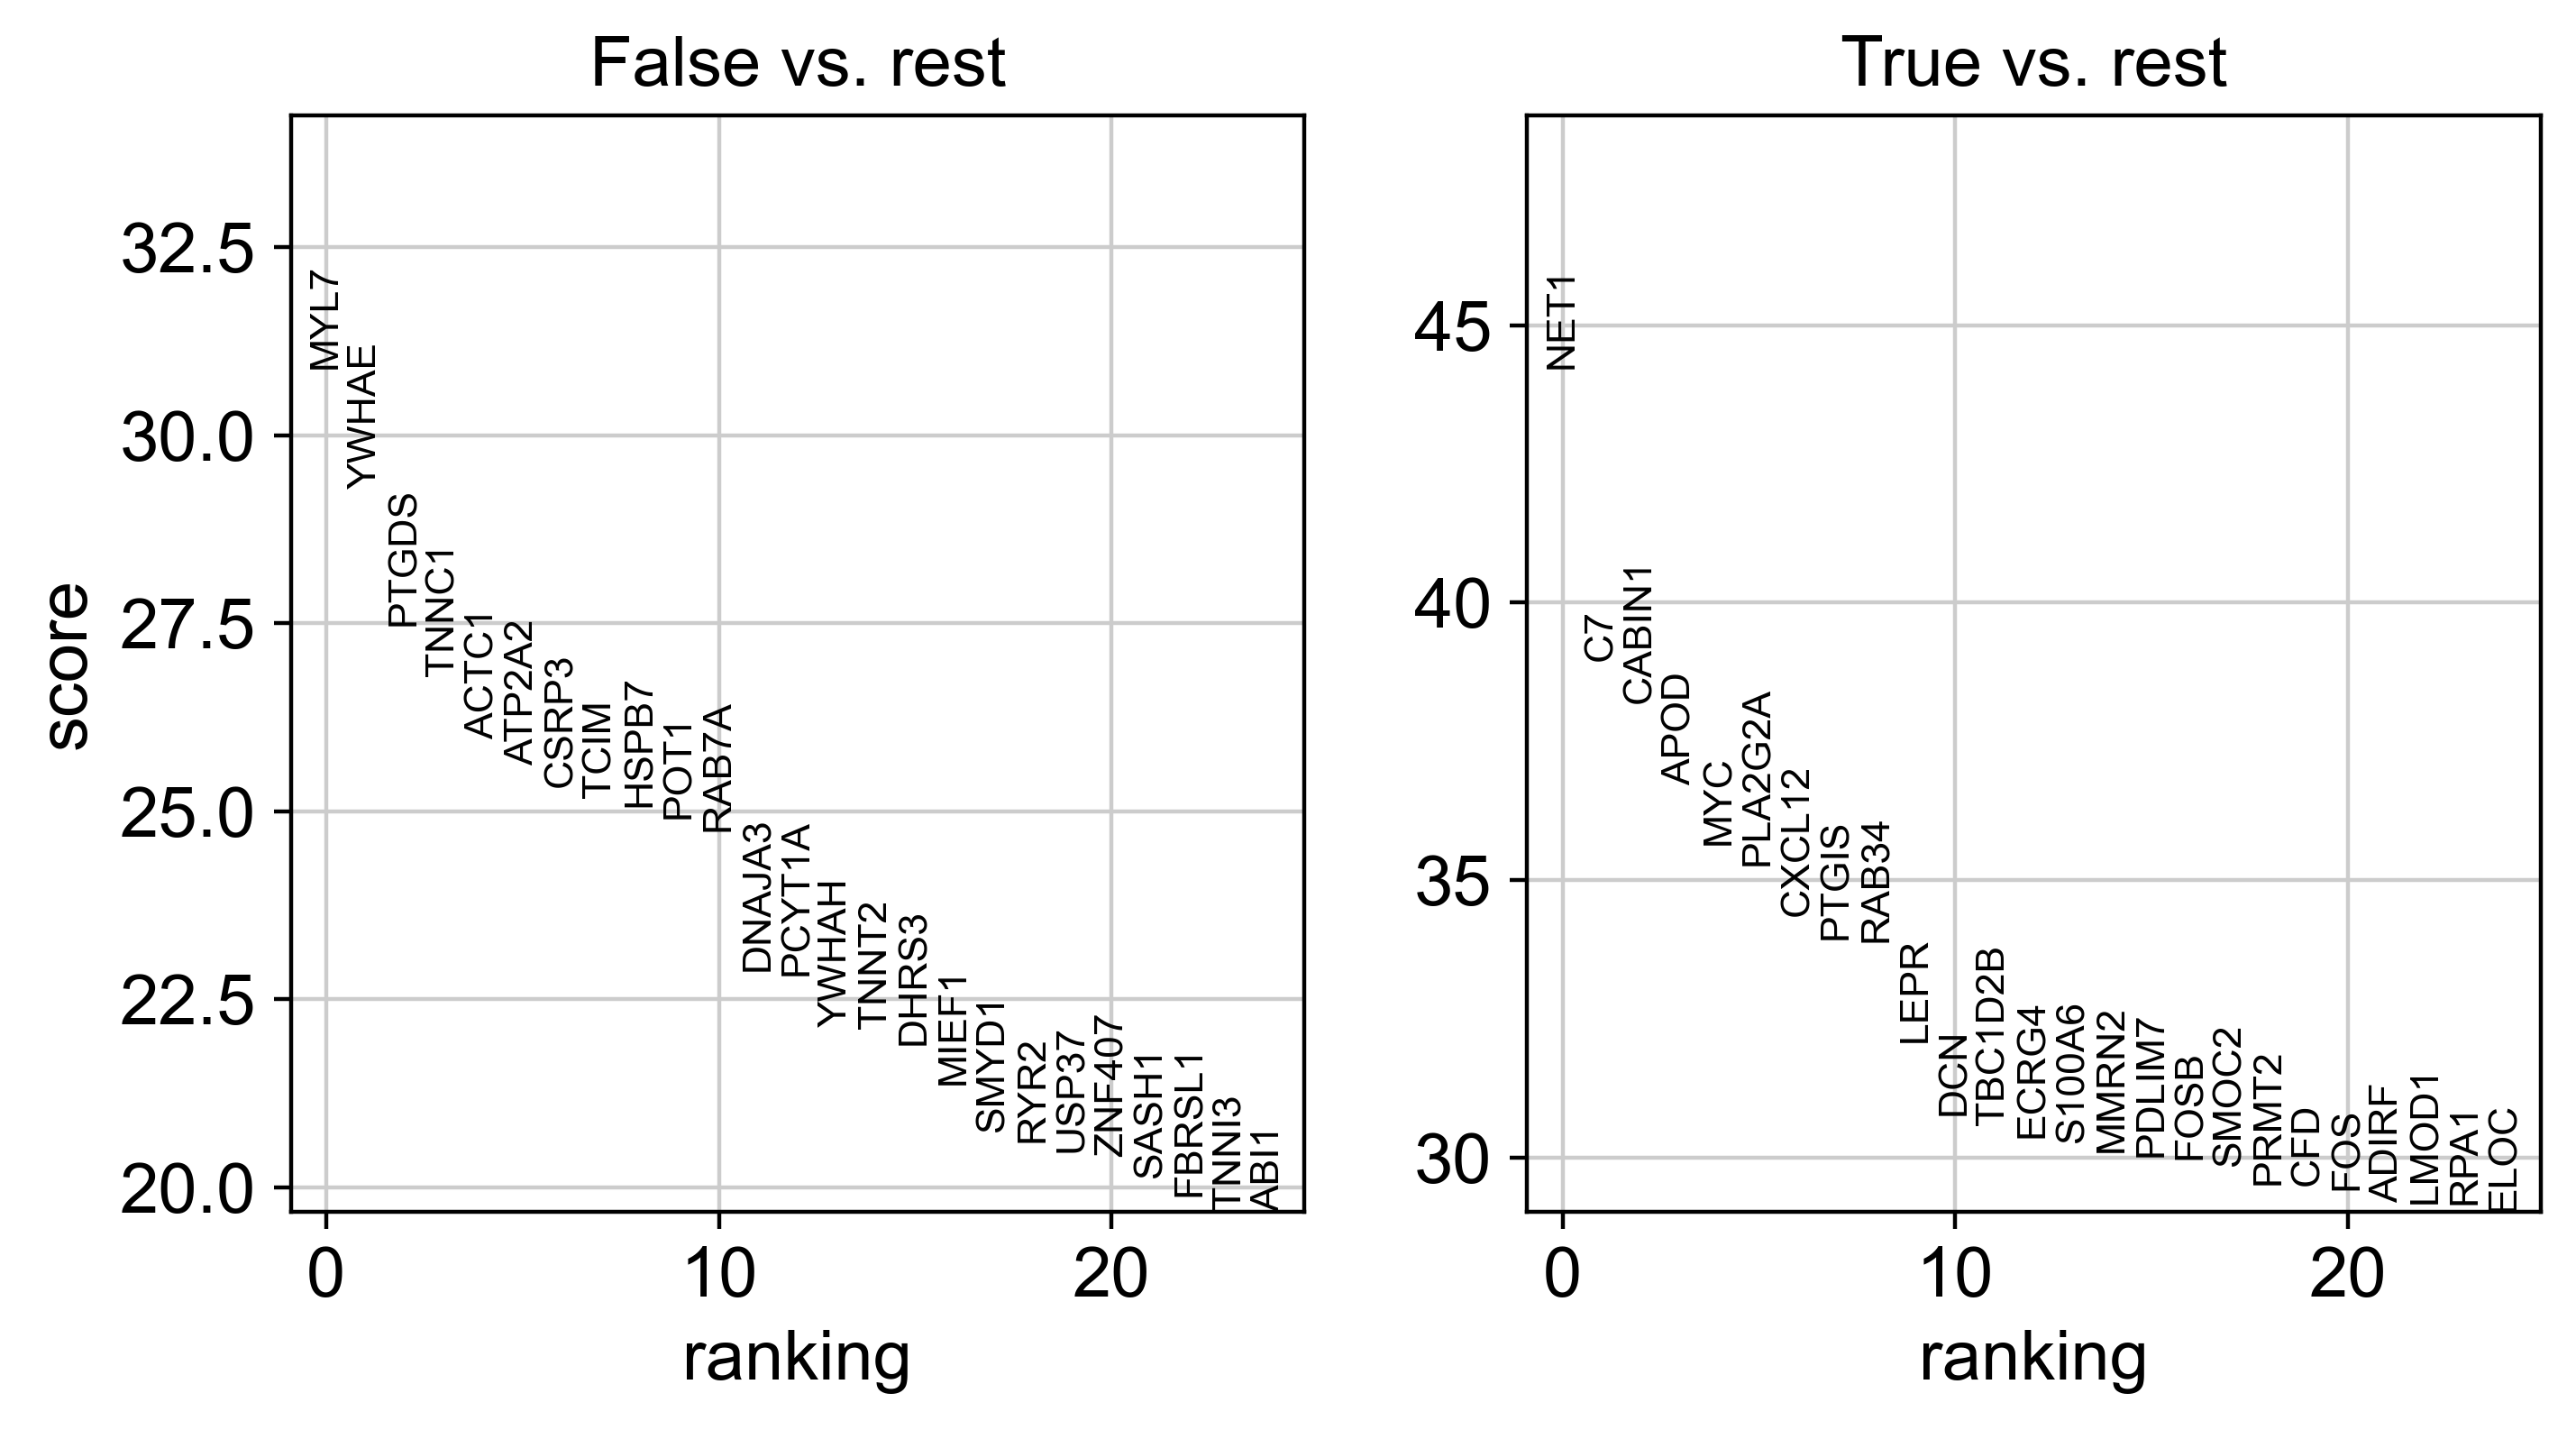

In [341]:
sc.tl.rank_genes_groups(adata_filter_unselected, 'PLA2G2A_high_express', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata_filter_unselected, n_genes=25, sharey=False, key = "t-test")

In [344]:
adata_filter_unselected[adata_filter_unselected.obs["PLA2G2A_high_express"] == True]

View of AnnData object with n_obs × n_vars = 323 × 6998
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'seg_label', 'spot_heterogeneity', 'node_weights', 'ROI', 'PLA2G2A_high_express'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'used_for_prediction', 'used_for_reduced', 'used_for_vae'
    uns: 'ROI_colors', 'cell_image_props', 'log1p', 'sample_colors', 'snn', 'spatial', 'PLA2G2A_high_express_colors', 't-test', 't-test_ov', 'wilcoxon'
    obsm: 'spatial'
    obsp: 'snn_connectivities', 'snn_knn_connectivities', 'snn_transition_matrix'

In [268]:
df = pd.DataFrame()

In [ ]:
df["gene_name"] = adata_filter_unselected.uns['t-test']["names"]["True"]
df["logfoldchanges"] = adata_filter_unselected.uns['t-test']["logfoldchanges"]["True"]
df["pvals_adj"] = adata_filter_unselected.uns['t-test']["pvals_adj"]["True"]

In [ ]:
df_s2=df[:500].copy()

### Combine

In [273]:
df_s1.index=df_s1["gene_name"]
del df_s1["gene_name"]

In [ ]:
df_s2.index=df_s2["gene_name"]
del df_s2["gene_name"]

In [ ]:
merged_df = pd.concat([df_s1, df_s2])

In [280]:
merged_df = merged_df.sort_values(by="pvals_adj")

In [281]:
merged_df

logfoldchanges      pvals_adj
gene_name                               
NET1             4.374765  1.068384e-172
APOD             3.041270  1.402890e-168
C7               3.497011  5.823321e-152
CABIN1           3.144209  3.558826e-144
CXCL12           2.727221  1.658699e-140
...                   ...            ...
CLEC20A          4.699933   1.434269e-18
CNKSR2           2.461204   1.505744e-18
ZBTB49           2.708574   1.630072e-18
CACNB4           2.880317   1.669832e-18
ALKAL1           3.174237   1.693237e-18

[1000 rows x 2 columns]

In [ ]:
merged_df[:500].to_csv("DEG_combine.csv")

# The list of DEGs will be sent to DAVID for functional enrichment analysis